# Implementation of Recurrent Models + Model Testing

Some essential file imports:

In [1]:
import torch
import torch.nn as nn

In [2]:
import embedding_players as ep

### Set Device

In [3]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

#If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")
#device = torch.device("cpu")

GPU is available


## Filepaths

Set the path to the dataset (should work automatically. If not, need to set it yourself.)

In [4]:
##BBB_filepath = "C:/Users/Marc/Documents/University/2022/Semester 1/STAT3007/Project/csv_files/cricsheet_data.csv"

In [4]:
import os
path_to_folder = os.path.dirname(os.path.realpath("__file__"))
BBB_filepath = path_to_folder + "\\csv_files\\cricsheet_data.csv"

## Import player embeddings

In [10]:
#Embedding hyperparams
bat_embed_size = 10
bowl_embed_size = 10
num_iters = 500

In [6]:
#, bowl_at_ball, model, results, pitch
bat_at_ball, bowl_at_ball, model, results, pitch, df = ep.get_embeddings(raw_data_file_name = BBB_filepath,
                                                                      batter_embed_size = bat_embed_size, 
                                                                      bowler_embed_size = bowl_embed_size, 
                                                                      num_it = num_iters)

C:\Users\Marc\Documents\University\2022\Semester 1\STAT3007\Project\embedding_players.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_val[wicket_title] = 1 * (ret_val["wicket_kind"] == wicket_title)


Epoch 0: train loss: 0.6639190912246704
Epoch 1: train loss: 0.6606390476226807
Epoch 2: train loss: 0.6573861241340637
Epoch 3: train loss: 0.6541586518287659
Epoch 4: train loss: 0.6509548425674438
Epoch 5: train loss: 0.6477729678153992
Epoch 6: train loss: 0.6446117162704468
Epoch 7: train loss: 0.641469419002533
Epoch 8: train loss: 0.6383447051048279
Epoch 9: train loss: 0.6352361440658569
Epoch 10: train loss: 0.6321424841880798
Epoch 11: train loss: 0.629062294960022
Epoch 12: train loss: 0.6259942650794983
Epoch 13: train loss: 0.6229373812675476
Epoch 14: train loss: 0.6198903918266296
Epoch 15: train loss: 0.6168521046638489
Epoch 16: train loss: 0.6138213276863098
Epoch 17: train loss: 0.610797107219696
Epoch 18: train loss: 0.6077784895896912
Epoch 19: train loss: 0.6047642230987549
Epoch 20: train loss: 0.6017534732818604
Epoch 21: train loss: 0.5987452864646912
Epoch 22: train loss: 0.5957387089729309
Epoch 23: train loss: 0.5927329063415527
Epoch 24: train loss: 0.58972

Epoch 197: train loss: 0.19674842059612274
Epoch 198: train loss: 0.1962698996067047
Epoch 199: train loss: 0.19580064713954926
Epoch 200: train loss: 0.19534043967723846
Epoch 201: train loss: 0.1948891133069992
Epoch 202: train loss: 0.1944464147090912
Epoch 203: train loss: 0.19401215016841888
Epoch 204: train loss: 0.19358617067337036
Epoch 205: train loss: 0.1931682527065277
Epoch 206: train loss: 0.1927582025527954
Epoch 207: train loss: 0.19235585629940033
Epoch 208: train loss: 0.19196100533008575
Epoch 209: train loss: 0.19157354533672333
Epoch 210: train loss: 0.19119325280189514
Epoch 211: train loss: 0.19081999361515045
Epoch 212: train loss: 0.19045357406139374
Epoch 213: train loss: 0.19009390473365784
Epoch 214: train loss: 0.18974079191684723
Epoch 215: train loss: 0.18939408659934998
Epoch 216: train loss: 0.18905365467071533
Epoch 217: train loss: 0.18871933221817017
Epoch 218: train loss: 0.18839100003242493
Epoch 219: train loss: 0.18806856870651245
Epoch 220: train

Epoch 390: train loss: 0.16826780140399933
Epoch 391: train loss: 0.16823114454746246
Epoch 392: train loss: 0.16819483041763306
Epoch 393: train loss: 0.16815884411334991
Epoch 394: train loss: 0.16812315583229065
Epoch 395: train loss: 0.16808776557445526
Epoch 396: train loss: 0.16805268824100494
Epoch 397: train loss: 0.1680179387331009
Epoch 398: train loss: 0.16798347234725952
Epoch 399: train loss: 0.16794930398464203
Epoch 400: train loss: 0.1679154336452484
Epoch 401: train loss: 0.16788184642791748
Epoch 402: train loss: 0.16784855723381042
Epoch 403: train loss: 0.16781555116176605
Epoch 404: train loss: 0.16778279840946198
Epoch 405: train loss: 0.16775034368038177
Epoch 406: train loss: 0.16771817207336426
Epoch 407: train loss: 0.16768626868724823
Epoch 408: train loss: 0.1676546186208725
Epoch 409: train loss: 0.16762322187423706
Epoch 410: train loss: 0.1675921231508255
Epoch 411: train loss: 0.16756124794483185
Epoch 412: train loss: 0.16753064095973969
Epoch 413: trai

In [7]:
bat_emb = bat_at_ball.shape[1]
bowl_emb = bowl_at_ball.shape[1]
num_res = results.shape[1]

# this is a safe bound number (T20 max balls per game): you can make the program a tiny bit quicker by making 
#this number smaller
max_size = 270

#Obtain a list of all unique game ids in dataset
all_game_ids = df["game_id"].unique()

each_game = {}

#Loop through the games and calculate some values
for game_id in all_game_ids:
    indexes = df["game_id"] == game_id
    num_in_go = sum(indexes)
    
    in_values = torch.cat([bat_at_ball[indexes], 
                           bowl_at_ball[indexes],
                           results[indexes]], 1).reshape(num_in_go, bat_emb+bowl_emb+num_res)
    
    batch_res = results[indexes]
    
    in_values = in_values[:max_size]
    batch_res = batch_res[:max_size]
    
    if in_values.shape[0] < max_size:
        cat_tens = torch.zeros(max_size - in_values.shape[0], in_values.shape[1])
        in_values = torch.cat([in_values, cat_tens])
        
        cat_tens = torch.zeros(max_size - batch_res.shape[0], batch_res.shape[1])
        batch_res = torch.cat([batch_res, cat_tens])
    
    #Offsetting the data by one for use in RNN
    each_game[game_id] = (in_values[:-1], batch_res[1:], pitch[indexes][0])


In [8]:
#Create the x and y data
list_of_games = [game for game, pred, pitch in each_game.values()]
x_data = torch.stack(list_of_games)

list_of_result =[pred for game, pred, pitch in each_game.values()]
y_data = torch.stack(list_of_result)

list_of_pitch = [torch.FloatTensor(pitch) for game, pred, pitch in each_game.values()]
pitch_data = torch.stack(list_of_pitch)

In [9]:
NUM_PITCHES = int(next(iter(each_game.values()))[2].shape[0])

In [10]:
NUM_PITCHES

134

Fixing an issue with the one-hot encoding. When there is a wicket, the zero-th column is also activated. 

In [11]:
for game in range(y_data.shape[0]):
    for ball in range(y_data.shape[1]):
        if sum(y_data[game][ball][7:] >= 1):
               y_data[game][ball][0] = 0

# for game in range(1,100):
#     for ball in range(269):
#         if y_data[game][ball][8] != 0:
#             print(game,ball)
# y_data[1][220]

Split the data into training and test sets

In [12]:
import numpy as np

number_of_games = len(df["game_id"].unique())
game_idx = [x for x in range(number_of_games)]
train_proportion = 0.7 #70-30 split currently
#Randomly pick indices for training set 
train_idx = np.random.choice(game_idx,int(np.round(train_proportion*number_of_games)),replace=False)
train_idx = set(train_idx)
game_idx = set(game_idx)
test_idx = game_idx - train_idx #set difference
test_idx = list(test_idx) #convert back to lists
train_idx = list(train_idx)

#Iterate through each game
x_data_list = x_data.tolist() #convert to lists because tensors are annoying
x_data_train = [x_data_list[a] for a in train_idx] #construct training data
x_data_test = [x_data_list[a] for a in test_idx]
x_data_train = torch.tensor(x_data_train)#convert back to tensors
x_data_test = torch.tensor(x_data_test)

y_data_list = y_data.tolist()
y_data_train = [y_data_list[a] for a in train_idx]
y_data_test = [y_data_list[a] for a in test_idx]
y_data_train = torch.tensor(y_data_train)
y_data_test = torch.tensor(y_data_test)

pitch_data_list = pitch_data.tolist()
pitch_data_train = [pitch_data_list[a] for a in train_idx]
pitch_data_test = [pitch_data_list[a] for a in test_idx]
pitch_data_train = torch.tensor(pitch_data_train)
pitch_data_test = torch.tensor(pitch_data_test)

x_data_train.to(device)
x_data_test.to(device)
y_data_train.to(device)
y_data_test.to(device)
pitch_data_train.to(device)
pitch_data_test.to(device)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [64]:
# #Save data as .pkl
# # import pickle

# with open('x_y_data.pkl', 'wb') as f:
#     pickle.dump(x_data_train, f)
#     pickle.dump(x_data_test, f)
#     pickle.dump(y_data_train, f)
#     pickle.dump(y_data_test, f)
#     pickle.dump(pitch_data_train, f)
#     pickle.dump(pitch_data_test, f)
#     pickle.dump(results,f)
#     pickle.dump(NUM_PITCHES,f)

Read in pre-saved data:

In [5]:
import pickle
with open('x_y_data.pkl', 'rb') as f:
    x_data_train = pickle.load(f)
    x_data_test = pickle.load(f)
    y_data_train = pickle.load(f)
    y_data_test = pickle.load(f)
    pitch_data_train = pickle.load(f)
    pitch_data_test = pickle.load(f)
    results = pickle.load(f)
    NUM_PITCHES = pickle.load(f)



## Define Recurrent NN


In [6]:
class Model(nn.Module):
    def __init__(self, bowl_dim, batt_dim, output_size, hidden_dim, n_layers, model_type):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.model_type = model_type
        self.output_size = output_size

        #Defining the layers
        # RNN Layer
        
        if model_type == "rnn":
            self.rnn = nn.RNN(bowl_dim + batt_dim + output_size, hidden_dim, n_layers, batch_first=True)
        elif model_type == "lstm":
            self.rnn = nn.LSTM(bowl_dim + batt_dim + output_size, hidden_dim, n_layers, batch_first=True)
        elif model_type == "gru": 
            self.rnn = nn.GRU(bowl_dim + batt_dim + output_size, hidden_dim, n_layers, batch_first=True)
        else:
            #instead of implementing proper error :)
            print(1/0)
        
            
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
        
        #self.sig = torch.nn.Sigmoid()
        #self.sig = torch.nn.Softmax(dim=2)   #switched to softmax activation along dim=2 (ie the outputs are normalised to a
        #sum of 1; probabilistic interpretation)
        

        self.pitch_transform = nn.Linear(NUM_PITCHES, self.n_layers * self.hidden_dim)
    
    def forward(self, x_data, pitch_data=None):
        # define input of RNN as concatination of both players and the runs vector
        # print(x.shape)
        
        batch_size = x_data.shape[0]
        
        if pitch_data is None: 
            # Initializing hidden state for first input using method defined below
            hidden = self.init_hidden(batch_size)
        else:
            hidden = self.init_hidden(batch_size, pitch = pitch_data)
        
        #Ensure that everything is on the correct device
        x_data = x_data.to(device)
        #hidden = hidden.to(device)
        
        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x_data, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out)
        
        return out  #changed for use with softmax
    
    def init_hidden(self, batch_size, pitch=None):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        
        if pitch is None:
            hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        else:
            pitch = pitch.to(device)
            # if we are given a pitch:
            hidden = self.pitch_transform(pitch)
            
            # small chance this will kick an error (change to 1 if broken)
            hidden = hidden.reshape(pitch.shape[0],  self.n_layers, self.hidden_dim)
            hidden = hidden.transpose(0,1)
            # if we want to look at pitch embeddings we need to pull apart this layer
            hidden = hidden.contiguous() #to fix some issues which cropped up when switching to GPU
        
        if self.model_type == "rnn":
            return hidden.to(device)
        elif self.model_type == "lstm":
            c0 = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
            return (hidden.to(device), c0.to(device))
        elif self.model_type == "gru":
            return hidden.to(device)


# Hyperparameter Tuning; Finding Optimal Model

Use grid-search to search the space of hyperparameters. Produce some graphs. Find best model. Train best model up to high epochs, run some simulations.

In [7]:
import numpy as np
#Set up some functions
# Training Run
def HPTrainingRun(x_dat,y_dat,hidden_dim_size,learning_rate,model_type,use_pitch_data,num_layers,
                  optimizer_Adam=True,n_epochs=100,suppress_output=True,periodically_test_acc=False):
    #Instantiate the model
    model = Model(bowl_dim = bowl_embed_size, batt_dim=bat_embed_size, 
              output_size=results.shape[1], hidden_dim=hidden_dim_size, n_layers=num_layers, model_type=model_type)
    #model = Model(bowl_dim = 10, batt_dim=10, output_size=16, hidden_dim=hidden_dim_size, n_layers=3, model_type=model_type)
    # We'll also set the model to the device that we defined earlier (default is CPU)
    model.to(device)
    
    model_acc_test = {}
    model_acc_train = {}
    losses = []

    #set the FC weights to random numbers in interval [-0.5,0.5]
    def init_weights(m): 
        if isinstance(m, nn.Linear):
            m.weight.data.uniform_(-0.5, 0.5)
            m.bias.data.uniform_(-0.5, 0.5)
    model.apply(init_weights)

    # Define hyperparameters
    lr=learning_rate

    # Define Loss, Optimizer
    criterion = nn.CrossEntropyLoss()
    if optimizer_Adam:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    # Training Run
    x_dat = x_dat.to(device)
    y_dat = y_dat.to(device)
    #pitch_data_train.to(device)

    #Need to create a label version of the onehot y_data for use with CrossEntropyLoss
    y_data_labels = torch.argmax(y_dat, dim=2)
    y_data_labels = torch.reshape(y_data_labels,(-1,)) #CrossEntropyLoss is quite picky about the inputs

    for epoch in range(1, n_epochs + 1):

        # RNN
        optimizer.zero_grad() # Clears existing gradients from previous epoch
        #input_seq.to(device)
        if (use_pitch_data):
            pred = model(x_dat,pitch_data_train)
        else:
            pred = model(x_dat)

        #Reshape and label-convert predictions for CrossEntropyLoss
        pred_shape = pred.shape
        pred_reshaped = torch.reshape(pred,(pred_shape[0]*pred_shape[1],-1))
        #print(pred_reshaped[0])

        loss = criterion(pred_reshaped, y_data_labels)
        loss.backward(retain_graph=True) # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
        
        losses.append(loss.item())

        if epoch%10 == 1 and not suppress_output:
            print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
            print("Loss: {:.4f}".format(loss.item()))
        
        if periodically_test_acc and epoch%100 == 0:
            test_acc = TestAccuracy(model,False)
            train_acc = TestAccuracy(model,True)
            model_acc_test[epoch] = test_acc
            model_acc_train[epoch] = train_acc
            print("Train acc:",train_acc)
            print("Test acc:",test_acc)

    
    return model, model_acc_test, model_acc_train,losses

#Takes the model and converts to an accuracy score
def TestAccuracy(model, on_train_set=False):
    
    accuracy = -42
    
    #Test the accuracy now:
    if (on_train_set):
        predictions = torch.softmax(model(x_data_train),dim=2)
    else:
        predictions = torch.softmax(model(x_data_test),dim=2)
    predictions = torch.reshape(predictions,(predictions.shape[0]*predictions.shape[1],-1))
    #Randomly sample from the probability distribution predicted from each ball
    predicted_outcome = []
    for pr in predictions:
        pr = pr.cpu().detach().numpy()
        arr = np.arange(model.output_size) #Specify a range of possibilities
        out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
        predicted_outcome.append(out)
    
    
    correct_prediction = [] #1 if correct, 0 otherwise
    #Reshape the y-data for ease of comparison to predictions
    if (on_train_set):
        y_data_labels = torch.argmax(y_data_train, dim=2) 
    else:
        y_data_labels = torch.argmax(y_data_test, dim=2) 
    y_data_labels = torch.reshape(y_data_labels,(-1,))
    #Loop through predictions and compare with desired result
    for i in range(len(predicted_outcome)):
        if predicted_outcome[i] == y_data_labels[i]:
            correct_prediction.append(1)
        else:
            correct_prediction.append(0)

    accuracy = sum(correct_prediction)/len(correct_prediction)
    
    return accuracy


In [8]:
#Using grid search
#Set the hyperparameter domains to check
hidden_dim_size = range(100,600,100)
learning_rate = [x**2/40000 for x in range(2,10)]
model_types = ["rnn","lstm","gru"]
num_layers = range(1,5,1)
use_pitch_data = (True,False)
num_epochs = 500
#optimizer_Adam = (True)


In [13]:
#Imports
import numpy as np

results_dict = {}
for h in hidden_dim_size:
    for lr in learning_rate:
        for mt in model_types:
            for pd in use_pitch_data:
                for nl in num_layers:
                    output,_,_,_ = HPTrainingRun(x_dat=x_data_train, y_dat=y_data_train, hidden_dim_size=h, learning_rate=lr, 
                                           num_layers = nl,
                                           model_type=mt, use_pitch_data=pd, optimizer_Adam=True, n_epochs = num_epochs)
                    acc = TestAccuracy(output)
                    results_dict[h,lr,mt,pd,nl] = acc
                    print("Hidden:",h," LR:",lr," MT:",mt," PD:",pd,"NL:",nl,"  done ")


Saving and loading results data:

In [9]:
#SAVE DATA (BE CAREFUL RUNNING THIS AS WILL OVERWRITE SAVED DATA)

# import pickle

# with open('h_param_results_github.pkl', 'wb') as f:
#     pickle.dump(results_dict, f)
        

In [9]:
#LOAD DATA:

import pickle
#Load the hyper-parameter optimisation results
with open('h_param_results_github.pkl', 'rb') as f:
    results_dict = pickle.load(f)



Make some graphs:

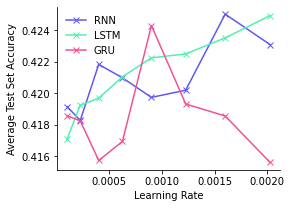

In [25]:
#Do some plotting!!
import matplotlib.pyplot as plt

#Create a plot of learning rate vs accuracy
p1_acc_rnn = []
p1_acc_lstm = []
p1_acc_gru = []
for lrate in learning_rate:
    rnns = []
    lstms = []
    grus = []
    for key in results_dict.keys():
        if key[1] == lrate:
            if (key[2] == "rnn"):
                rnns.append(results_dict[key])
            if (key[2] == "lstm"):
                lstms.append(results_dict[key])
            if (key[2] == "gru"):
                grus.append(results_dict[key])
    rnn_av = sum(rnns) / len(rnns)
    lstm_av = sum(lstms) / len(lstms)
    gru_av = sum(grus) / len(grus)
    p1_acc_rnn.append(rnn_av)
    p1_acc_lstm.append(lstm_av)
    p1_acc_gru.append(gru_av)
    

plt.rcParams.update({'font.size': 10})

fig1 = plt.figure(0)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(learning_rate,p1_acc_rnn,c="#6156f0",marker="x", label = "RNN")
plt.plot(learning_rate,p1_acc_lstm,c="#51f0ac",marker="x", label = "LSTM")
plt.plot(learning_rate,p1_acc_gru,c="#f05195",marker="x", label = "GRU")
plt.xlabel("Learning Rate")
plt.ylabel("Average Test Set Accuracy")
plt.legend(frameon=False)
plt.savefig("graph1",transparent=True,bbox_inches = "tight")

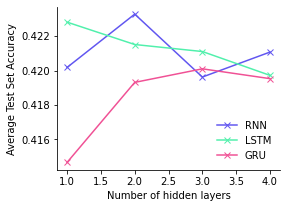

In [26]:
#Do some plotting!!
import matplotlib.pyplot as plt

#Create a plot of learning rate vs accuracy
p1_acc_rnn = []
p1_acc_lstm = []
p1_acc_gru = []
for nl in num_layers:
    rnns = []
    lstms = []
    grus = []
    for key in results_dict.keys():
        if key[4] == nl:
            if (key[2] == "rnn"):
                rnns.append(results_dict[key])
            if (key[2] == "lstm"):
                lstms.append(results_dict[key])
            if (key[2] == "gru"):
                grus.append(results_dict[key])
    rnn_av = sum(rnns) / len(rnns)
    lstm_av = sum(lstms) / len(lstms)
    gru_av = sum(grus) / len(grus)
    p1_acc_rnn.append(rnn_av)
    p1_acc_lstm.append(lstm_av)
    p1_acc_gru.append(gru_av)
    

#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 10})

fig1 = plt.figure(0)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(num_layers,p1_acc_rnn,c="#6156f0",marker="x", label = "RNN")
plt.plot(num_layers,p1_acc_lstm,c="#51f0ac",marker="x", label = "LSTM")
plt.plot(num_layers,p1_acc_gru,c="#f05195",marker="x", label = "GRU")
plt.xlabel("Number of hidden layers")
plt.ylabel("Average Test Set Accuracy")
plt.legend(frameon=False)
plt.savefig("graph2",transparent=True,bbox_inches = "tight")

## Train the best models

In [18]:
#Determine best model (by test set accuracy) of each type (vanilla RNN, LSTM, GRU)
res_keys = list(results_dict.keys())
best_rnn_acc = 0
best_rnn_index = -42
best_lstm_acc = 0
best_lstm_index = -42
best_gru_acc = 0
best_gru_index = -42

for rk in res_keys:
    if rk[2] == 'rnn':
        if (results_dict[rk] > best_rnn_acc):
            best_rnn_acc = results_dict[rk]
            best_rnn_index = rk
    if rk[2] == 'gru':
        if (results_dict[rk] > best_gru_acc):
            best_gru_acc = results_dict[rk]
            best_gru_index = rk
    if rk[2] == 'lstm':
        if (results_dict[rk] > best_lstm_acc):
            best_lstm_acc = results_dict[rk]
            best_lstm_index = rk
print("The best vanilla RNN is:",best_rnn_index)
print("The best LSTM is:",best_lstm_index)
print("The best GRU is:",best_gru_index)
best_rnn_acc, best_lstm_acc, best_gru_acc

The best vanilla RNN is: (200, 0.002025, 'rnn', True, 2)
The best LSTM is: (100, 0.000625, 'lstm', False, 3)
The best GRU is: (200, 0.0009, 'gru', True, 4)


(0.437546468401487, 0.4351920693928129, 0.46047087980173484)

In [15]:
#Train best model:
num_epochs = 1200


best_GRU,GRU_test_acc,GRU_train_acc,GRU_losses = HPTrainingRun(x_dat=x_data_train, y_dat=y_data_train, hidden_dim_size=200, 
                                                               learning_rate=0.0009, num_layers = 4,
                                           model_type='gru', use_pitch_data=True, optimizer_Adam=True, n_epochs = num_epochs,
                          suppress_output = False,periodically_test_acc = True)

best_LSTM,LSTM_test_acc,LSTM_train_acc,LSTM_losses = HPTrainingRun(x_dat=x_data_train, y_dat=y_data_train, hidden_dim_size=100, 
                                                               learning_rate=0.000625, num_layers = 3,
                                           model_type='lstm', use_pitch_data=False, optimizer_Adam=True, n_epochs = num_epochs,
                          suppress_output = False,periodically_test_acc = True)

best_RNN,RNN_test_acc,RNN_train_acc,RNN_losses = HPTrainingRun(x_dat=x_data_train, y_dat=y_data_train, hidden_dim_size=200, 
                                                               learning_rate=0.002025, num_layers = 2,
                                           model_type='rnn', use_pitch_data=True, optimizer_Adam=True, n_epochs = num_epochs,
                          suppress_output = False,periodically_test_acc = True)

Epoch: 1/1200............. Loss: 2.5852
Epoch: 11/1200............. Loss: 1.4029
Epoch: 21/1200............. Loss: 1.3297
Epoch: 31/1200............. Loss: 1.3005
Epoch: 41/1200............. Loss: 1.2946
Epoch: 51/1200............. Loss: 1.2910
Epoch: 61/1200............. Loss: 1.2870
Epoch: 71/1200............. Loss: 1.2837
Epoch: 81/1200............. Loss: 1.3058
Epoch: 91/1200............. Loss: 1.2837
Train acc: 0.39747211895910783
Test acc: 0.39132589838909543
Epoch: 101/1200............. Loss: 1.2792
Epoch: 111/1200............. Loss: 1.2773
Epoch: 121/1200............. Loss: 1.2738
Epoch: 131/1200............. Loss: 1.2710
Epoch: 141/1200............. Loss: 1.2684
Epoch: 151/1200............. Loss: 1.2656
Epoch: 161/1200............. Loss: 1.2625
Epoch: 171/1200............. Loss: 1.2590
Epoch: 181/1200............. Loss: 1.2557
Epoch: 191/1200............. Loss: 1.2885
Train acc: 0.3937546468401487
Test acc: 0.38800495662949197
Epoch: 201/1200............. Loss: 1.2518
Epoch: 2

Epoch: 511/1200............. Loss: 1.2915
Epoch: 521/1200............. Loss: 1.2907
Epoch: 531/1200............. Loss: 1.2902
Epoch: 541/1200............. Loss: 1.2897
Epoch: 551/1200............. Loss: 1.2933
Epoch: 561/1200............. Loss: 1.2900
Epoch: 571/1200............. Loss: 1.2886
Epoch: 581/1200............. Loss: 1.2877
Epoch: 591/1200............. Loss: 1.2883
Train acc: 0.39723844928305896
Test acc: 0.39172242874845103
Epoch: 601/1200............. Loss: 1.2900
Epoch: 611/1200............. Loss: 1.2885
Epoch: 621/1200............. Loss: 1.2869
Epoch: 631/1200............. Loss: 1.2854
Epoch: 641/1200............. Loss: 1.2857
Epoch: 651/1200............. Loss: 1.2873
Epoch: 661/1200............. Loss: 1.2925
Epoch: 671/1200............. Loss: 1.2975
Epoch: 681/1200............. Loss: 1.2916
Epoch: 691/1200............. Loss: 1.2907
Train acc: 0.40860329261816253
Test acc: 0.40475836431226764
Epoch: 701/1200............. Loss: 1.2897
Epoch: 711/1200............. Loss: 1.2

Epoch: 1021/1200............. Loss: 1.3579
Epoch: 1031/1200............. Loss: 1.3070
Epoch: 1041/1200............. Loss: 1.2963
Epoch: 1051/1200............. Loss: 1.2941
Epoch: 1061/1200............. Loss: 1.2899
Epoch: 1071/1200............. Loss: 1.2905
Epoch: 1081/1200............. Loss: 1.2920
Epoch: 1091/1200............. Loss: 1.2880
Train acc: 0.39545406266595856
Test acc: 0.3942998760842627
Epoch: 1101/1200............. Loss: 1.2855
Epoch: 1111/1200............. Loss: 1.2896
Epoch: 1121/1200............. Loss: 1.2909
Epoch: 1131/1200............. Loss: 1.2864
Epoch: 1141/1200............. Loss: 1.2839
Epoch: 1151/1200............. Loss: 1.2958
Epoch: 1161/1200............. Loss: 1.3064
Epoch: 1171/1200............. Loss: 1.2955
Epoch: 1181/1200............. Loss: 1.2899
Epoch: 1191/1200............. Loss: 1.2847
Train acc: 0.39598513011152414
Test acc: 0.3966294919454771


In [63]:
# # import pickle
# # #Save the results
# with open('best_models.pkl', 'wb') as f:
#     pickle.dump(best_GRU, f)
#     pickle.dump(GRU_test_acc, f)
#     pickle.dump(GRU_train_acc, f)
#     pickle.dump(GRU_losses, f)
#     pickle.dump(best_LSTM, f)
#     pickle.dump(LSTM_test_acc, f)
#     pickle.dump(LSTM_train_acc, f)
#     pickle.dump(LSTM_losses, f)
#     pickle.dump(best_RNN, f)
#     pickle.dump(RNN_test_acc, f)
#     pickle.dump(RNN_train_acc, f)
#     pickle.dump(RNN_losses, f)



In [6]:

import pickle
with open('best_models.pkl', 'rb') as f:
    best_GRU = pickle.load(f)
    GRU_test_acc = pickle.load(f)
    GRU_train_acc = pickle.load(f)
    GRU_losses = pickle.load(f)
    best_LSTM = pickle.load(f)
    LSTM_test_acc = pickle.load(f)
    LSTM_train_acc = pickle.load(f)
    LSTM_losses = pickle.load(f)
    best_RNN = pickle.load(f)
    RNN_test_acc = pickle.load(f)
    RNN_train_acc = pickle.load(f)
    RNN_losses = pickle.load(f)

## Benchmarks

In [19]:
#Construct a very naive proportion based model and test (not finished):s
y_data_labels = torch.argmax(y_data_train, dim=2)
y_data_labels = torch.reshape(y_data_labels,(-1,)) 
outcome_proportions = []
#Estimate proportions of each outcome
for b in range(results.shape[1]):
    count = 0
    total = 0
    for a in y_data_labels:
        if (a == b):
            count += 1
        total+=1
    outcome_proportions.append(count/total)

y_data_labels = torch.argmax(y_data_test, dim=2)
y_data_labels = torch.reshape(y_data_labels,(-1,)) 
guesses = np.random.choice(np.arange(results.shape[1]),len(y_data_labels),replace=True,p=outcome_proportions)

correct = 0
for r in range(len(y_data_labels)):
    if guesses[r] == y_data_labels[r]:
        correct += 1

bench_acc = correct / len(y_data_labels)
print("Naive estimator model accuracy:",bench_acc)
#print("Balanced acc",met.balanced_accuracy_score(y_data_labels,guesses))

Naive estimator model accuracy: 0.3117224287484511


In [33]:
#Determine the proportion of balls with runs = 0

y_data_labels = torch.argmax(y_data_test, dim=2)
y_data_labels = torch.reshape(y_data_labels,(-1,)) #CrossEntropyLoss is quite picky about the inputs
count = 0
total = 0
for a in y_data_labels:
    if (a == 0):
        count += 1
    total+=1
print("Proportion of balls with runs = 0 in test set, ", count/total)


Proportion of balls with runs = 0 in test set,  0.4072862453531598


## Various performance measures

Test set

In [26]:
import numpy as np
#Obtain the model predictions (GRU):
GRU_predictions = torch.softmax(best_GRU(x_data_test),dim=2)
GRU_predictions = torch.reshape(GRU_predictions,(GRU_predictions.shape[0]*GRU_predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
GRU_predicted_outcome = []
for pr in GRU_predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_GRU.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    GRU_predicted_outcome.append(out)

# #LSTM:
LSTM_predictions = torch.softmax(best_LSTM(x_data_test),dim=2)
LSTM_predictions = torch.reshape(LSTM_predictions,(LSTM_predictions.shape[0]*LSTM_predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
LSTM_predicted_outcome = []
for pr in LSTM_predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_LSTM.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    LSTM_predicted_outcome.append(out)

# #Vanilla RNN:
RNN_predictions = torch.softmax(best_RNN(x_data_test),dim=2)
RNN_predictions = torch.reshape(RNN_predictions,(RNN_predictions.shape[0]*RNN_predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
RNN_predicted_outcome = []
for pr in RNN_predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_RNN.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    RNN_predicted_outcome.append(out)

In [27]:
#Get test labels:
y_data_labels = torch.argmax(y_data_test, dim=2) 
y_data_labels = torch.reshape(y_data_labels,(-1,))

In [28]:
import sklearn.metrics as met
#Accuracy
RNN_accuracy = met.accuracy_score(y_data_labels,RNN_predicted_outcome)
LSTM_accuracy = met.accuracy_score(y_data_labels,LSTM_predicted_outcome)
GRU_accuracy = met.accuracy_score(y_data_labels,GRU_predicted_outcome)
print(RNN_accuracy,LSTM_accuracy,GRU_accuracy)

#Balanced accuracy
RNN_balanced_acc = met.balanced_accuracy_score(y_data_labels,RNN_predicted_outcome)
LSTM_balanced_acc = met.balanced_accuracy_score(y_data_labels,LSTM_predicted_outcome)
GRU_balanced_acc = met.balanced_accuracy_score(y_data_labels,GRU_predicted_outcome)
print(RNN_balanced_acc,LSTM_balanced_acc,GRU_balanced_acc)

#F1 Score
RNN_f1_score = met.f1_score(y_data_labels,RNN_predicted_outcome,average='weighted')
LSTM_f1_score = met.f1_score(y_data_labels,LSTM_predicted_outcome,average='weighted')
GRU_f1_score = met.f1_score(y_data_labels,GRU_predicted_outcome,average='weighted')
print(RNN_f1_score,LSTM_f1_score,GRU_f1_score)

#Matthews Correlation Coefficient
RNN_MCC = met.matthews_corrcoef(y_data_labels,RNN_predicted_outcome)
LSTM_MCC = met.matthews_corrcoef(y_data_labels,LSTM_predicted_outcome)
GRU_MCC = met.matthews_corrcoef(y_data_labels,GRU_predicted_outcome)
print(RNN_MCC,LSTM_MCC,GRU_MCC)

0.3894919454770756 0.4110532837670384 0.37298636926889717
0.09021176793073818 0.09449068625718891 0.09388300100962507
0.3901252034375582 0.40801516243671015 0.39353002772664203
0.12384609956956331 0.14981526934629305 0.13895766688119704


Training set:

In [29]:
import numpy as np
#Obtain the model predictions (GRU):
GRU_predictions = torch.softmax(best_GRU(x_data_train),dim=2)
GRU_predictions = torch.reshape(GRU_predictions,(GRU_predictions.shape[0]*GRU_predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
GRU_predicted_outcome = []
for pr in GRU_predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_GRU.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    GRU_predicted_outcome.append(out)

# #LSTM:
LSTM_predictions = torch.softmax(best_LSTM(x_data_train),dim=2)
LSTM_predictions = torch.reshape(LSTM_predictions,(LSTM_predictions.shape[0]*LSTM_predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
LSTM_predicted_outcome = []
for pr in LSTM_predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_LSTM.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    LSTM_predicted_outcome.append(out)

# #Vanilla RNN:
RNN_predictions = torch.softmax(best_RNN(x_data_train),dim=2)
RNN_predictions = torch.reshape(RNN_predictions,(RNN_predictions.shape[0]*RNN_predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
RNN_predicted_outcome = []
for pr in RNN_predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_RNN.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    RNN_predicted_outcome.append(out)

In [30]:
#Get test labels:
y_data_labels = torch.argmax(y_data_train, dim=2) 
y_data_labels = torch.reshape(y_data_labels,(-1,))

In [32]:
import sklearn.metrics as met
#Standard accuracy
RNN_accuracy = met.accuracy_score(y_data_labels,RNN_predicted_outcome)
LSTM_accuracy = met.accuracy_score(y_data_labels,LSTM_predicted_outcome)
GRU_accuracy = met.accuracy_score(y_data_labels,GRU_predicted_outcome)
print(RNN_accuracy,LSTM_accuracy,GRU_accuracy)

#Balanced accuracy
RNN_balanced_acc = met.balanced_accuracy_score(y_data_labels,RNN_predicted_outcome)
LSTM_balanced_acc = met.balanced_accuracy_score(y_data_labels,LSTM_predicted_outcome)
GRU_balanced_acc = met.balanced_accuracy_score(y_data_labels,GRU_predicted_outcome)
print(RNN_balanced_acc,LSTM_balanced_acc,GRU_balanced_acc)

#F1 Score
RNN_f1_score = met.f1_score(y_data_labels,RNN_predicted_outcome,average='weighted')
LSTM_f1_score = met.f1_score(y_data_labels,LSTM_predicted_outcome,average='weighted')
GRU_f1_score = met.f1_score(y_data_labels,GRU_predicted_outcome,average='weighted')
print(RNN_f1_score,LSTM_f1_score,GRU_f1_score)

#Matthews Correlation Coefficient
RNN_MCC = met.matthews_corrcoef(y_data_labels,RNN_predicted_outcome)
LSTM_MCC = met.matthews_corrcoef(y_data_labels,LSTM_predicted_outcome)
GRU_MCC = met.matthews_corrcoef(y_data_labels,GRU_predicted_outcome)
print(RNN_MCC,LSTM_MCC,GRU_MCC)

0.3987466808284652 0.41070631970260224 0.3879978757302177
0.083583937342468 0.0879698977327342 0.09775521788351187
0.4001944283437716 0.408514832074068 0.4113507498499944
0.13345206400238477 0.14522961442895296 0.16002345297673976


## Produce some final visualisations

First produce some training and test set accuracy plots for the best GRU, LSTM and vanilla RNN:

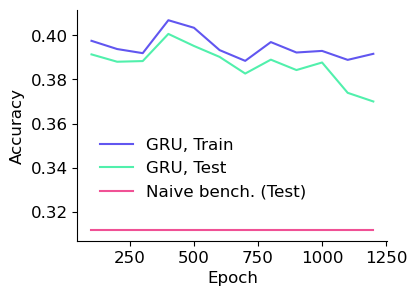

In [40]:
#GRU
ep = list(GRU_test_acc.keys())
accs_train = []
accs_test = []
benchmark_accs = []
for e in ep:
    accs_train.append(GRU_train_acc[e])
    accs_test.append(GRU_test_acc[e])
    benchmark_accs.append(bench_acc)
import matplotlib.pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12})
fig1 = plt.figure(1)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(ep,accs_train,c="#6156f0",label="GRU, Train")
plt.plot(ep,accs_test,c="#51f0ac",label="GRU, Test")
plt.plot(ep,benchmark_accs,c="#f05195",label="Naive bench. (Test)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc=(0.05,0.15),frameon=False)
#plt.show()
plt.savefig("graph_acc_1",transparent=False,bbox_inches = "tight")


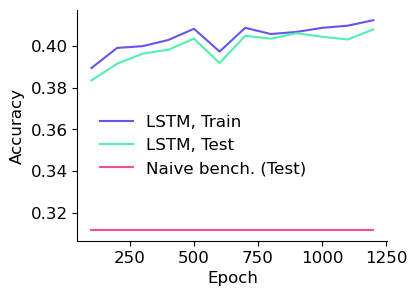

In [41]:
#LSTM
ep = list(LSTM_test_acc.keys())
accs_train = []
accs_test = []
benchmark_accs = []
for e in ep:
    accs_train.append(LSTM_train_acc[e])
    accs_test.append(LSTM_test_acc[e])
    benchmark_accs.append(bench_acc)
import matplotlib.pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12})
fig1 = plt.figure(2)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(ep,accs_train,c="#6156f0",label="LSTM, Train")
plt.plot(ep,accs_test,c="#51f0ac",label="LSTM, Test")
plt.plot(ep,benchmark_accs,c="#f05195",label="Naive bench. (Test)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc=(0.05,0.25),frameon=False)
plt.savefig("graph_acc_2",transparent=True,bbox_inches = "tight")


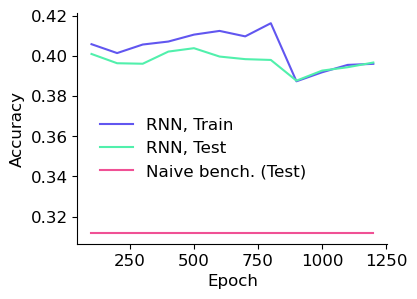

In [42]:
#Vanilla RNN
ep = list(RNN_test_acc.keys())
accs_train = []
accs_test = []
benchmark_accs = []
for e in ep:
    accs_train.append(RNN_train_acc[e])
    accs_test.append(RNN_test_acc[e])
    benchmark_accs.append(bench_acc)
import matplotlib.pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12})
fig1 = plt.figure(3)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(ep,accs_train,c="#6156f0",label="RNN, Train")
plt.plot(ep,accs_test,c="#51f0ac",label="RNN, Test")
plt.plot(ep,benchmark_accs,c="#f05195",label="Naive bench. (Test)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc=(0.05,0.25),frameon=False)
plt.savefig("graph_acc_3",transparent=True,bbox_inches = "tight")


Now produce some loss plots

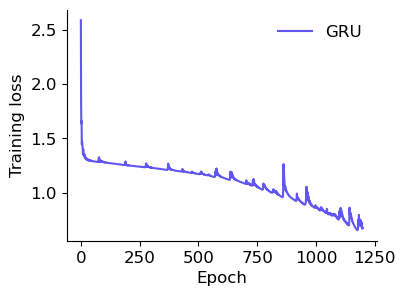

In [43]:
#Plot loss:
import matplotlib.pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12})
fig1 = plt.figure(4)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(range(num_epochs),GRU_losses,c="#6156f0",label="GRU")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.legend(frameon=False)
plt.savefig("loss_gru",transparent=True,bbox_inches = "tight")


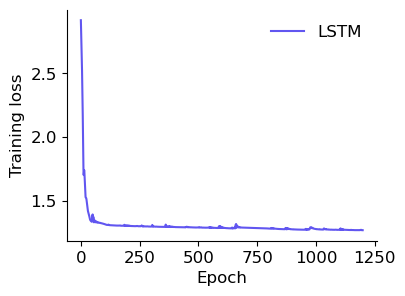

In [44]:
#Plot loss:
import matplotlib.pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12})
fig1 = plt.figure(4)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(range(num_epochs),LSTM_losses,c="#6156f0",label="LSTM")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.legend(frameon=False)
plt.savefig("loss_lstm",transparent=True,bbox_inches = "tight")


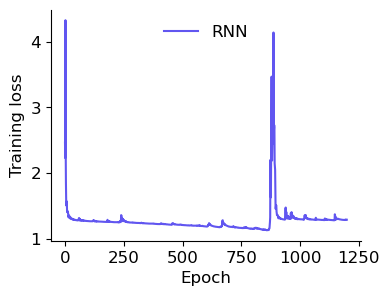

In [45]:
#Plot loss:
import matplotlib.pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12})
fig1 = plt.figure(4)
fig1.set_figheight(3)
fig1.set_figwidth(4)
ax = plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(range(num_epochs),RNN_losses,c="#6156f0",label="RNN")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.legend(frameon=False)
plt.savefig("loss_rnn",transparent=True,bbox_inches = "tight")


In [36]:
#Test final accuracy:
accs = []
for a in range(10):
    accs.append(TestAccuracy(best_GRU,on_train_set = False))
acc = np.mean(accs)

In [37]:
print("Accuracy of best model:", acc)

Accuracy of best model: 0.39898389095415115


In [38]:
#Test final accuracy:
accs = []
for a in range(10):
    accs.append(TestAccuracy(best_GRU,on_train_set = True))
acc = np.mean(accs)
print("Accuracy of best model:", acc)

Accuracy of best model: 0.39746999468932553


In [54]:
#Produce confusion matrix for GRU

#Initialise a dictionary to contain the confusion data
confusion_data = {}

for a in range(results.shape[1]):
    for b in range(results.shape[1]):
        confusion_data[a,b] = 0

#Test the accuracy now:
predictions = torch.softmax(best_GRU(x_data_test),dim=2)
predictions = torch.reshape(predictions,(predictions.shape[0]*predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
predicted_outcome = []
for pr in predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_GRU.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    predicted_outcome.append(out)


#Reshape the y-data for ease of comparison to predictions
y_data_labels = torch.argmax(y_data_test, dim=2) 
y_data_labels = torch.reshape(y_data_labels,(-1,))
#Loop through predictions and compare with desired result
for i in range(len(predicted_outcome)):
    confusion_data[y_data_labels[i].item(),predicted_outcome[i]] += 1


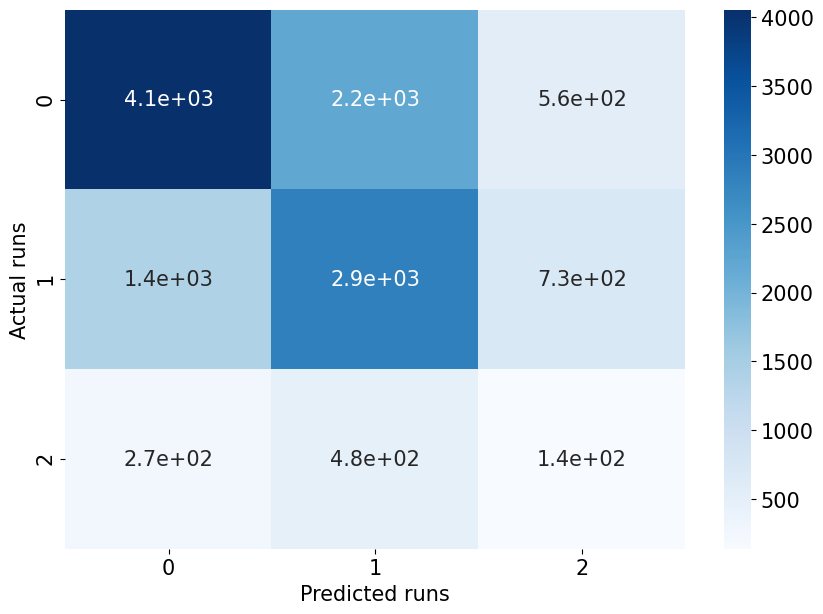

In [55]:
#Plot the confusion matrix
confusion_mat = []
for a in range(3):
    confusion_row = []
    for b in range(3): 
        confusion_row.append(confusion_data[a,b])
    confusion_mat.append(confusion_row)

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])

plt.rcParams.update({'font.size': 15})

plt.figure(figsize = (10,7))
pal = sn.color_palette("Blues", as_cmap=True)
sn.heatmap(df_cm, cmap = pal, annot=True)
plt.xlabel("Predicted runs")
plt.ylabel("Actual runs")
#plt.show()

plt.savefig("conf_matrix_GRU",transparent=True,bbox_inches = "tight")

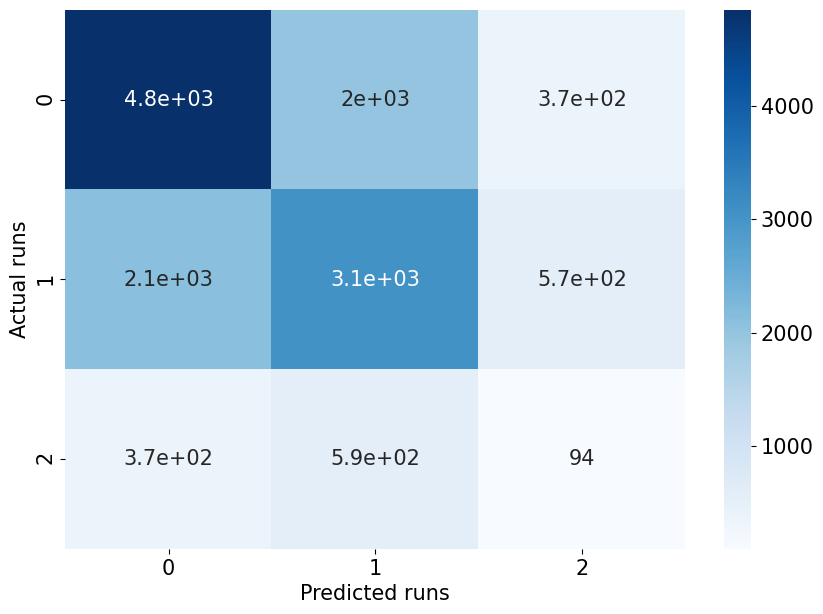

In [51]:
#Produce confusion matrix for LSTM

#Initialise a dictionary to contain the confusion data
confusion_data = {}

for a in range(results.shape[1]):
    for b in range(results.shape[1]):
        confusion_data[a,b] = 0

#Test the accuracy now:
predictions = torch.softmax(best_LSTM(x_data_test),dim=2)
predictions = torch.reshape(predictions,(predictions.shape[0]*predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
predicted_outcome = []
for pr in predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_GRU.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    predicted_outcome.append(out)


#Reshape the y-data for ease of comparison to predictions
y_data_labels = torch.argmax(y_data_test, dim=2) 
y_data_labels = torch.reshape(y_data_labels,(-1,))
#Loop through predictions and compare with desired result
for i in range(len(predicted_outcome)):
    confusion_data[y_data_labels[i].item(),predicted_outcome[i]] += 1

#Plot the confusion matrix
confusion_mat = []
for a in range(3):
    confusion_row = []
    for b in range(3): 
        confusion_row.append(confusion_data[a,b])
    confusion_mat.append(confusion_row)

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])

plt.rcParams.update({'font.size': 15})

plt.figure(figsize = (10,7))
pal = sn.color_palette("Blues", as_cmap=True)
sn.heatmap(df_cm, cmap = pal, annot=True)
plt.xlabel("Predicted runs")
plt.ylabel("Actual runs")
#plt.show()

plt.savefig("conf_matrix_LSTM",transparent=True,bbox_inches = "tight")

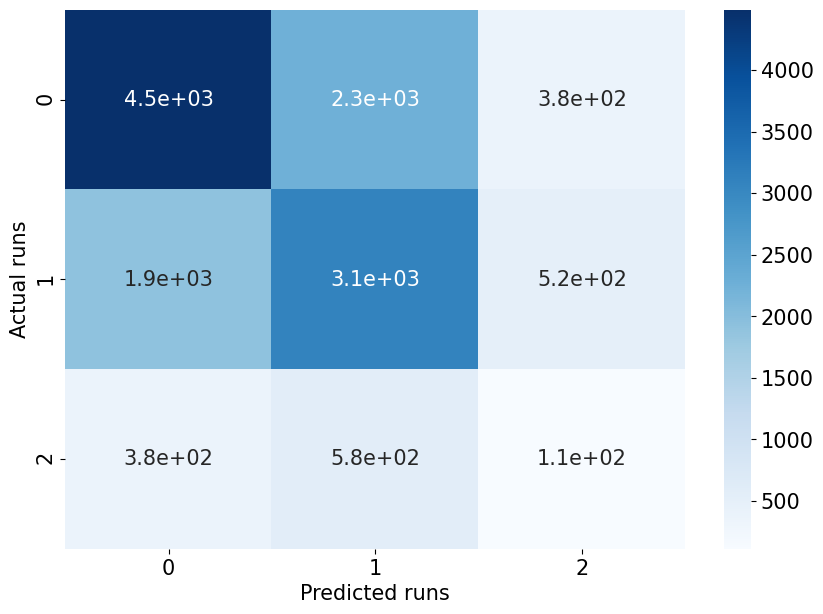

In [52]:
#Produce confusion matrix for RNN

#Initialise a dictionary to contain the confusion data
confusion_data = {}

for a in range(results.shape[1]):
    for b in range(results.shape[1]):
        confusion_data[a,b] = 0

#Test the accuracy now:
predictions = torch.softmax(best_RNN(x_data_test),dim=2)
predictions = torch.reshape(predictions,(predictions.shape[0]*predictions.shape[1],-1))
#Randomly sample from the probability distribution predicted from each ball
predicted_outcome = []
for pr in predictions:
    pr = pr.cpu().detach().numpy()
    arr = np.arange(best_GRU.output_size) #Specify a range of possibilities
    out = np.random.choice(arr, p=pr) #Randomly sample according to the probability distribution
    predicted_outcome.append(out)


#Reshape the y-data for ease of comparison to predictions
y_data_labels = torch.argmax(y_data_test, dim=2) 
y_data_labels = torch.reshape(y_data_labels,(-1,))
#Loop through predictions and compare with desired result
for i in range(len(predicted_outcome)):
    confusion_data[y_data_labels[i].item(),predicted_outcome[i]] += 1

#Plot the confusion matrix
confusion_mat = []
for a in range(3):
    confusion_row = []
    for b in range(3): 
        confusion_row.append(confusion_data[a,b])
    confusion_mat.append(confusion_row)

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])

plt.rcParams.update({'font.size': 15})

plt.figure(figsize = (10,7))
pal = sn.color_palette("Blues", as_cmap=True)
sn.heatmap(df_cm, cmap = pal, annot=True)
plt.xlabel("Predicted runs")
plt.ylabel("Actual runs")
#plt.show()

plt.savefig("conf_matrix_RNN",transparent=True,bbox_inches = "tight")

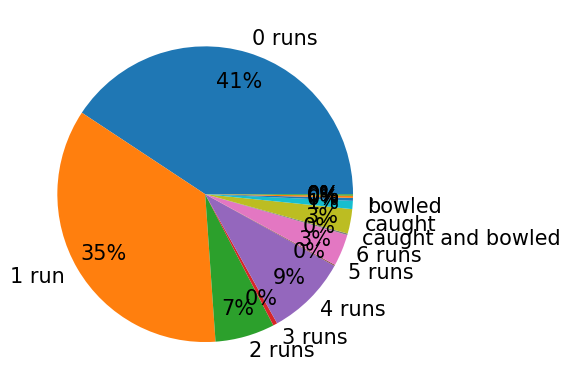

In [75]:
#Produce pie chart of ball outcomes in test set
import matplotlib.pyplot as plt
len(outcome_proportions)
labels = ["0 runs","1 run","2 runs","3 runs","4 runs","5 runs","6 runs","caught and bowled","caught","bowled",
          ".",".",".",".","."]
# labels = ["0 runs","1 run","2 runs","3 runs","4 runs","5 runs","6 runs","caught and bowled","caught","bowled",
#           "lbw","run out","stumped","retired hurt","hit wicket"]
plt.pie(outcome_proportions,labels=labels,autopct='%1.0f%%',pctdistance=0.8)
plt.show()
plt.savefig("pie_chart",transparent=True,bbox_inches = "tight")